In [1]:
#!pip install bltk

##**Importing Libraries**


In [2]:
# pip install pandas numpy matplotlib scikit-learn

In [3]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import pandas as pd
import codecs

/var/folders/h6/8r6f_lmx5lg2nq9hn36037600000gn/T/ipykernel_6187/1510700665.py:16: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)



In [5]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']
Vowel signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']
Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']
Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']
Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']
Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [6]:
INPUT_FILE = "comment2.txt"
stopwords_list ="stopwords.txt"

##**Dataset Preparation and Cleaning**

In [7]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()
# print(bangla_stopwords)
# print(len(bangla_stopwords))


fin = codecs.open(INPUT_FILE, "r", encoding='utf-8')
for line in fin:
  
    _, sent = line.strip().split("\t") #Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ",sent)

    words = tokenizer.word_tokenizer(sent)
    print("Afert Tokenizing: ",words)

    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    print("Truncating punctuation:", wordsExcludingPunctuationMarks)
    
    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)

#     if len(wordsExcludingStopWords) > maxlen: #For calculating the maximum number of words in a sentence
#         maxlen = len(wordsExcludingStopWords) 
#         print(maxlen)
#     for wordExcludingStopWords in wordsExcludingStopWords:
#         counter[wordExcludingStopWords] += 1 #Putting the frequency of each  word in a dictionary
#         print(counter[wordExcludingStopWords])
#     print("***************************************************************************************")

    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))


fin.close()
    


Label:  1
Sentence:  ভালো একটি প্রোডাক্ট পেয়েছি ধন্যবাদ দারাজ ধন্যবাদ ডেলিভারি বয় এন্ড ইউজ করে আরো ভালো লাগছে অন্যেরাও কিনতে পারেন আপনাদের পূর্ণ খুব ভালো
Afert Tokenizing:  ['ভালো', 'একটি', 'প্রোডাক্ট', 'পেয়েছি', 'ধন্যবাদ', 'দারাজ', 'ধন্যবাদ', 'ডেলিভারি', 'বয়', 'এন্ড', 'ইউজ', 'করে', 'আরো', 'ভালো', 'লাগছে', 'অন্যেরাও', 'কিনতে', 'পারেন', 'আপনাদের', 'পূর্ণ', 'খুব', 'ভালো']
Truncating punctuation: ['ভালো', 'একটি', 'প্রোডাক্ট', 'পেয়েছি', 'ধন্যবাদ', 'দারাজ', 'ধন্যবাদ', 'ডেলিভারি', 'বয়', 'এন্ড', 'ইউজ', 'করে', 'আরো', 'ভালো', 'লাগছে', 'অন্যেরাও', 'কিনতে', 'পারেন', 'আপনাদের', 'পূর্ণ', 'খুব', 'ভালো']
Truncating StopWords: ['ভালো', 'প্রোডাক্ট', 'পেয়েছি', 'ধন্যবাদ', 'দারাজ', 'ধন্যবাদ', 'ডেলিভারি', 'বয়', 'এন্ড', 'ইউজ', 'আরো', 'ভালো', 'লাগছে', 'অন্যেরাও', 'কিনতে', 'আপনাদের', 'পূর্ণ', 'ভালো']
Label:  1
Sentence:  এবং আপনাদের ডেলিভারি মেন খুব ভালো
Afert Tokenizing:  ['এবং', 'আপনাদের', 'ডেলিভারি', 'মেন', 'খুব', 'ভালো']
Truncating punctuation: ['এবং', 'আপনাদের', 'ডেলিভারি', 'মেন', 'খুব', 'ভালো']


In [8]:
xs

['ভালো প্রোডাক্ট পেয়েছি ধন্যবাদ দারাজ ধন্যবাদ ডেলিভারি বয় এন্ড ইউজ আরো ভালো লাগছে অন্যেরাও কিনতে আপনাদের পূর্ণ ভালো',
 'আপনাদের ডেলিভারি মেন ভালো',
 'তাড়াতাড়ি পণ্য গেলাম,ধন্যবাদ',
 'একদম ভাল না সবিতে যেরকম সিলো না পুরান',
 'রিটান দিলে নেয়না',
 'নিতাম না',
 'নিবেন না',
 'অল্প টাকায় প্রডাক্ট টা ভালো',
 'বিড়ি খোর দের দরকারি একটা প্রডাক্ট চাইলে',
 'সেলারের ভালো ছিলো',
 'ধন্যবাদ দারাজ',
 'লাইটার টা সুন্দর',
 'ব্যাটারি ক্যাপাসিটি আরেকটু বেশি ভালো হতো দাম ঠিক',
 'একটা কথা না বললেই নয় প্যাকেটটা একদম ইনটেক দারাজ সেলারকে ধন্যবাদ',
 'অল দ্যা বেস্ট দারাজ',
 'অল্প টাকায় প্রডাক্ট টা ভালো',
 'সেলারের ভালো ছিলো',
 'ভালো প্রডাক্ট চাইলে আপনারা কিনতে',
 'আলহামদুলিল্লাহ প্রোডাক্ট টা খুবই ভালো',
 'আলহামদুলিল্লাহ ভালো প্রোডাক্টটা ভালো চার্জ ভালো ভালো আপনারা চাইলে',
 'সেলার ভাইকে ধন্যবাদ কারন পন্য বাসাত ঠিক দেয়ার',
 'ভালো আপনারা',
 'জিনিস টা খুপ ভালো আপনারা চাইলে',
 'ভাল সবাই',
 'টা অর্ডার করছিলাম ঠিক তেমনটাই পেয়েছি ধন্যবাদ দার আজকে ধন্যবাদ ছেলের',
 'কম দামে জিনিস টা ভালো',
 'আপনেও চাইলে কিনতে সমস্যা ন

##**TF-IDF**

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['ভাল',
 'ভালোই',
 'ভালো আশা দারাজ সাথে থাকুন',
 'আলহামদুলিল্লাহ প্রোডাক্ট টা খুবই ভালো',
 'ভাল পণ্য',
 'দুর্দান্ত পণ্য',
 'ভাল পণ্য ধন্যবাদ',
 'ধন্যবাদ সেলার প্রডাক্ট টা আসলে ভালো সবাই',
 'তাড়াতাড়ি পণ্য গেলাম,ধন্যবাদ',
 'বিল্ড কোয়ালিটি ভালো',
 'একদম লাইট ওয়েট',
 'পণ্য ভাল',
 'ধন্যবাদ দারাজ',
 'দারুন প্রডাক্ট',
 'পছন্দ হইছে',
 'ভালো হয়েছে',
 'পণ্য দিয়েছে',
 'দারাজ ভালো একটা পণ্য পেলাম',
 'প্রোডাক্ট মানে ভালো নিঃসন্দেহে কিনতে দ্বিতীয় অর্ডার',
 'ভাল জিনিস,সবাই',
 'চার্জ না রিটার্ন করলাম',
 'সত্যিই সিস্টেম পছন্দ',
 'দামের ভাল মানের বিক্রয়কর্মীর ধন্যবাদ',
 'আশা ভালো লাগবে যাক',
 'ভালো',
 'বললাম ভাই একটু দিয়ে যেতেন ভাল হতো দিয়ে না',
 'ব্যাবহার একদম সহজ বাতাসেও নিভে যাওয়ার ভয় নেই',
 'ধাতব ফিনিস ভাল মানের',
 'দাম বিবেচনায় জিনিসটা ভালো',
 'মোটামুটি মানের ভালো',
 'সুন্দর পণ্য পছন্দ',
 'প্রডাক্ট ভাল ভাল বন্দুরা',
 'খুবই ভালো একটা প্রডাক্ট',
 'প্লাস্টিকের তৈরি সূক্ষ্ম',
 'একটা কথা না বললেই নয় প্যাকেটটা একদম ইনটেক দারাজ সেলারকে ধন্যবাদ',
 'বিক্রেতা এছাড়াও ভাল',
 'ভাল মানের',
 'সেলার ভাইকে 

In [10]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)


n_samples: 115, n_features: 731


/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)



n_samples: 39, n_features: 731


##**Naive Bayes**

In [12]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
#predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

In [13]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=naive_bayes_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=naive_bayes_classifier.classes_)
disp.plot()
plt.show()

/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

[[ 1  0  6]
 [ 0  0  1]
 [ 0  0 31]]
0.8205128205128205
              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           0       0.00      0.00      0.00         1
           1       0.82      1.00      0.90        31

    accuracy                           0.82        39
   macro avg       0.61      0.38      0.38        39
weighted avg       0.83      0.82      0.76        39



NameError: name 'clf' is not defined

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)


In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=LRClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LRClassification.classes_)
disp.plot()
plt.show()

[[ 1  0  6]
 [ 0  0  1]
 [ 0  0 31]]
0.8205128205128205
              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           0       0.00      0.00      0.00         1
           1       0.82      1.00      0.90        31

    accuracy                           0.82        39
   macro avg       0.61      0.38      0.38        39
weighted avg       0.83      0.82      0.76        39



/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

NameError: name 'plot_confusion_matrix' is not defined

##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=DTClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=DTClassification.classes_)
disp.plot()
plt.show()

[[ 3  0  4]
 [ 0  0  1]
 [ 0  0 31]]
0.8717948717948718
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60         7
           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.93        31

    accuracy                           0.87        39
   macro avg       0.62      0.48      0.51        39
weighted avg       0.86      0.87      0.84        39



/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

NameError: name 'plot_confusion_matrix' is not defined

##**SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[ 2  0  5]
 [ 0  0  1]
 [ 0  0 31]]
0.8461538461538461
              precision    recall  f1-score   support

          -1       1.00      0.29      0.44         7
           0       0.00      0.00      0.00         1
           1       0.84      1.00      0.91        31

    accuracy                           0.85        39
   macro avg       0.61      0.43      0.45        39
weighted avg       0.85      0.85      0.80        39



/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

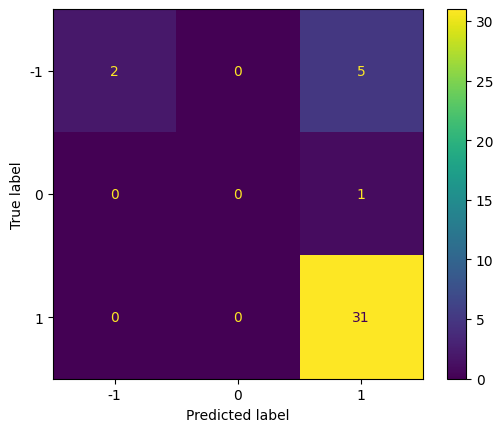

In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[ 2  0  5]
 [ 0  0  1]
 [ 0  0 31]]
0.8461538461538461
              precision    recall  f1-score   support

          -1       1.00      0.29      0.44         7
           0       0.00      0.00      0.00         1
           1       0.84      1.00      0.91        31

    accuracy                           0.85        39
   macro avg       0.61      0.43      0.45        39
weighted avg       0.85      0.85      0.80        39



/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

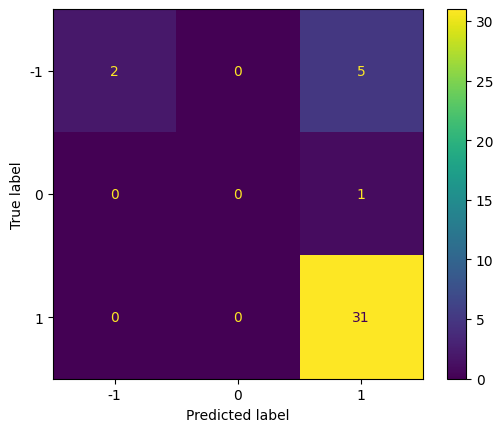

In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_classifier.classes_)
disp.plot()
plt.show()

##**SGD**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'squared_error',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[ 0  3  4]
 [ 1  0  0]
 [10 13  8]]
0.20512820512820512
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.00      0.00      0.00         1
           1       0.67      0.26      0.37        31

    accuracy                           0.21        39
   macro avg       0.22      0.09      0.12        39
weighted avg       0.53      0.21      0.30        39



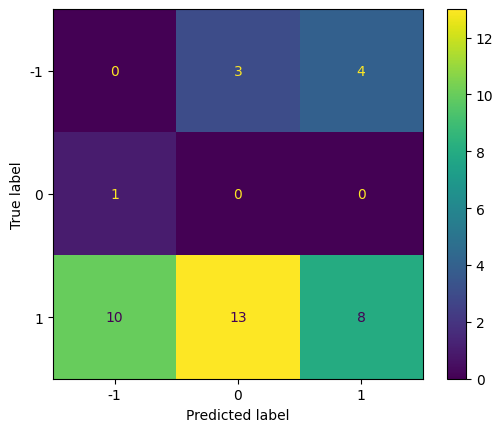

In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=sgd_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_classifier.classes_)
disp.plot()
plt.show()

##**RandomizedSearchCV**

In [ ]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}
              
rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(Xtrain_tf, Ytrain) 
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)
  

/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/sirajussalekin/Desktop/nlpTaskClassification/myenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/sirajussalekin/Desktop/nlpTaskClass

[[ 0  3  4]
 [ 1  0  0]
 [10 13  8]]
0.20512820512820512
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.00      0.00      0.00         1
           1       0.67      0.26      0.37        31

    accuracy                           0.21        39
   macro avg       0.22      0.09      0.12        39
weighted avg       0.53      0.21      0.30        39



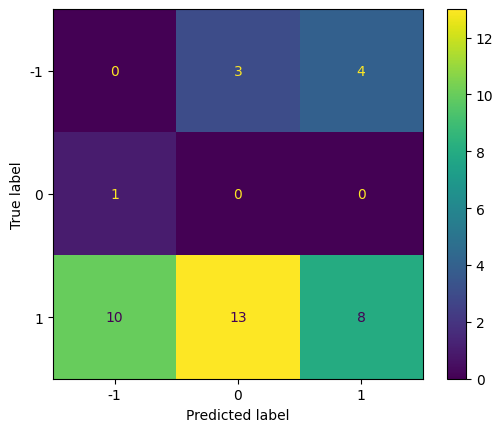

In [ ]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=rand_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rand_search.classes_)
disp.plot()
plt.show()